In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l
import sys
import os

# Add parent directory to sys.path
sys.path.insert(0, os.path.abspath('..'))

# Now import your module from the parent folder
import utils

In [10]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2, batch_size = 784, 10, 256, 256,256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [3]:
dropout1, dropout2 = 0.2, 0.5

In [11]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784,256),
                    nn.ReLU(),
                    nn.Dropout(dropout1),
                    nn.Linear(256, 256),
                    nn.ReLU(),
                    nn.Dropout(dropout2),
                    nn.Linear(256,10)
                    )

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal(m.weight, std=0.01)

net.apply(init_weights)

/var/folders/14/0scl675d3v3g49w__z0jgvj40000gn/T/ipykernel_61688/3725749088.py:13: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  nn.init.normal(m.weight, std=0.01)


Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=256, out_features=10, bias=True)
)

RuntimeError: 0D or 1D target tensor expected, multi-target not supported

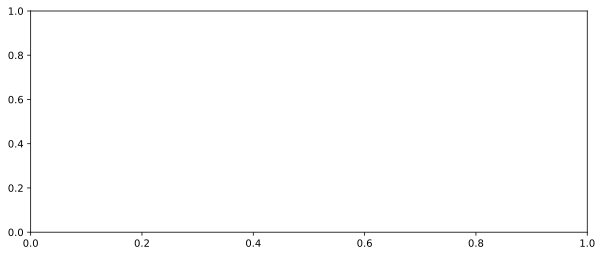

In [12]:

num_epochs, lr = 10,0.5

loss = nn.CrossEntropyLoss(reduction='none')
trainer= torch.optim.SGD(net.parameters(), lr = lr)

utils.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)